## Statistical Bigram Model Implementation

- Bigram Language Model
- Bigram Language Model with Laplace smoothing / add-k smoothing

In [1]:
import torch
import matplotlib.pyplot as plt

from dataset import get_all_stories, get_dataset, CharacterLevelTokenizer

In [2]:
train_stories, val_stories, test_stories = get_all_stories()

In [5]:
tokenizer = CharacterLevelTokenizer()
vocab_size = tokenizer.vocab_size

In [4]:
Xtr, Ytr = get_dataset(train_stories, tokenizer)
Xval, Yval = get_dataset(val_stories, tokenizer)
Xtest, Ytest = get_dataset(test_stories, tokenizer)

In [6]:
class BigramLanguageModel:
    def __init__(self, vocab_size, k = 1):
        self.vocab_size = vocab_size
        self.N = torch.zeros((self.vocab_size, self.vocab_size)) + k
        self.P = None

    def fit(self, X):
        for ix1, ix2 in zip(X, X[1:]):
            self.N[ix1, ix2] += 1

        self.P = self.N / self.N.sum(1, keepdim=True)
    
    def __call__(self, X):
        return self.P[X]

    def generate(self, start_token=0, generator=None):
        ix = start_token
        out = []
        while True:
            p = self.P[ix]
            ix = torch.multinomial(p, num_samples=1, replacement=True, generator=generator).item()
            if ix == start_token:
                break
            out.append(ix)

        return out

In [7]:
bigram_model = BigramLanguageModel(vocab_size=vocab_size)
bigram_model.fit(Xtr)

In [9]:
ids = bigram_model.generate()

print(tokenizer.decode(ids))

, ouly brncewon e touig ws chiss m mbyoxhulefivindill sp tily d enott w. be o a f thed t thariven Wonthe cedyil sstouxnd y ie s Whacll. thexx. bict THed hesose grilice tw t, " winey.
Mid whe tule a t hill BqOA_


In [16]:
g = torch.Generator().manual_seed(42)
ids = bigram_model.generate(generator=g)

print(tokenizer.decode(ids))

That be s wimale toteind t Ljshous "OXVJisf s thired:ve t stho h f tl LZ;But kimese ilyoongr, tidounin gas whert
icedklicum k s his Fchanowiche he ceaidlenofod ched g arto cid mumeste boitho lpa it
'Oheyff as ingate atothe vea tt no ce p
stoufTHe KFo whivy he incrid ofled s t
Now
ven arug ust thberONTheanedMeasisoutonke, at ste fotonkchee n owhasise dakn!QG-?CMothaito anch|bealer ide s meat he, onoF e toxea t
As me, as
"S owapotsancharawanlyoindin'sh pof wn tVJve hedy!"VFjYDoswo ds thirinie applotadome t._


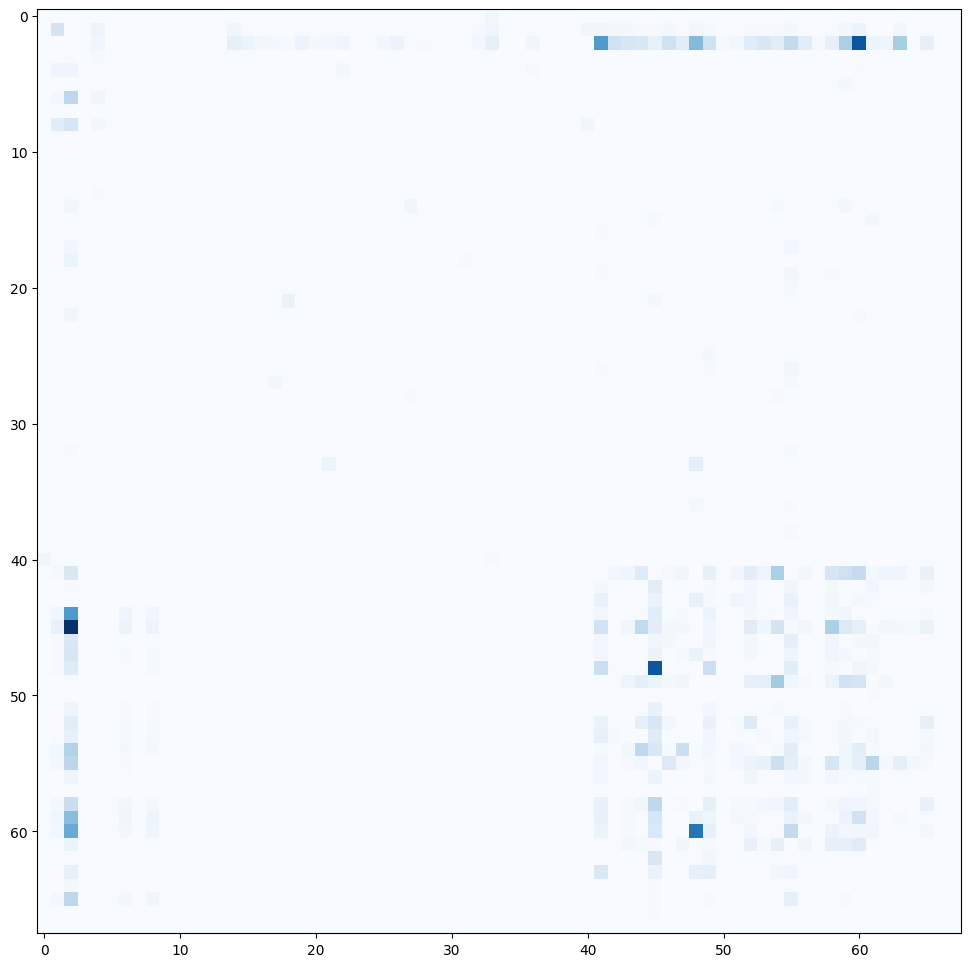

In [13]:
plt.figure(figsize=(12, 12))
plt.imshow(bigram_model.N, cmap='Blues')
plt.show()

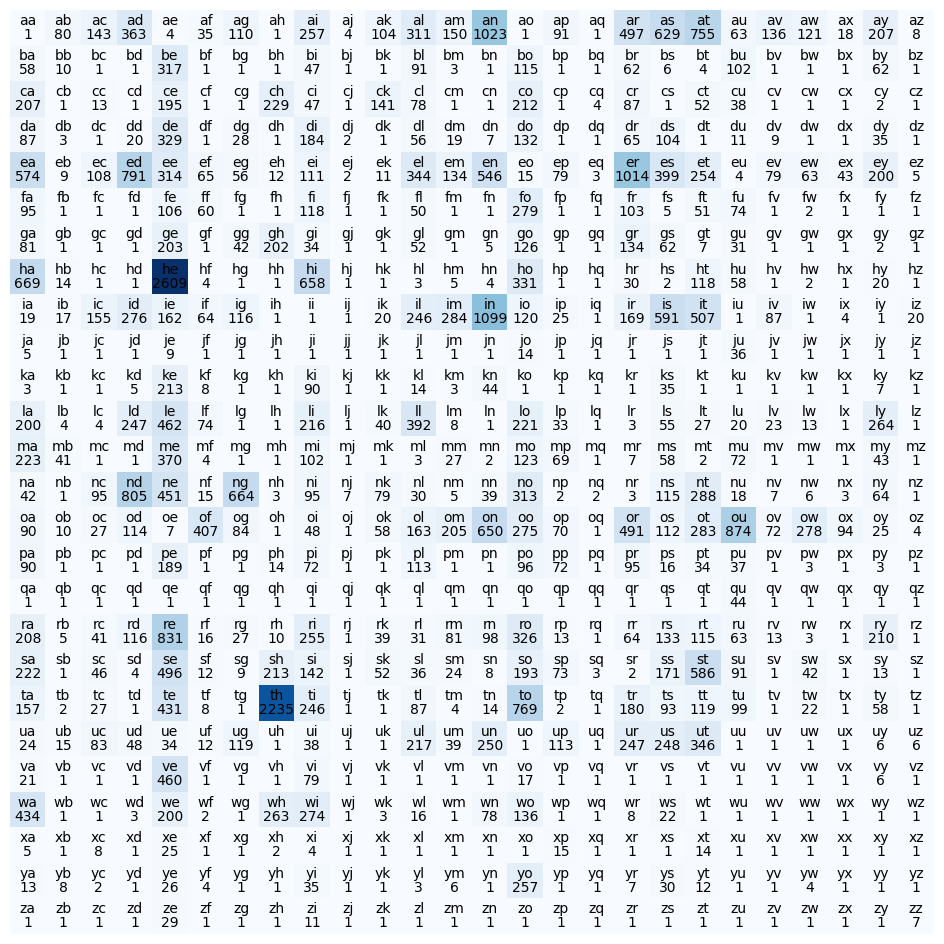

In [14]:
a_ix, z_ix = tokenizer.encode('az')
a_to_z_counts = bigram_model.N[a_ix:z_ix+1, a_ix:z_ix+1]

plt.figure(figsize=(12, 12))
plt.imshow(a_to_z_counts, cmap='Blues')

for ix1 in range(a_ix, z_ix+1):
    for ix2 in range(a_ix, z_ix+1):
        txt = tokenizer.decode([ix2, ix1])
        cnt = a_to_z_counts[ix2-a_ix, ix1-a_ix].int().item()
        plt.text(ix1-a_ix, ix2-a_ix, txt, ha='center', va='bottom')
        plt.text(ix1-a_ix, ix2-a_ix, cnt, ha='center', va='top')

plt.axis('off')
plt.show()

Find loss

In [21]:
@torch.no_grad()
def find_loss(X, Y):
    probs = bigram_model(X)
    loss = -probs[torch.arange(len(X)), Y].log().mean()
    return loss.item()

In [22]:
find_loss(Xtr, Ytr)

2.4167346954345703

In [23]:
find_loss(Xval, Yval)

2.478590488433838

In [24]:
find_loss(Xtest, Ytest)

2.4689509868621826